In [16]:
import pandas as pd
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.io import decode_image

train_image_path = val_image_path = "./dataset/fairface-img-margin025-trainval/"
train_label_path = "./dataset/fairface_label_train.csv"
val_label_path = "./dataset/fairface_label_val.csv"


In [17]:
classes = ['East Asian', 'Indian', 'Black', 'White', 'Middle Eastern', 'Latino_Hispanic', 'Southeast Asian']
class_count = 7

class FairFaceDataset(Dataset):
    def __init__(self, image_path, label_path, transform=None):
        self.image_path = image_path
        self.file_path = pd.read_csv(label_path)["file"]
        self.labels_raw = pd.read_csv(label_path)["race"]

        cat = pd.Categorical(self.labels_raw, categories = classes, ordered = True)
        cat = pd.Series(cat.codes)
        # One-hot encode the labels
        self.labels = torch.nn.functional.one_hot(torch.tensor(cat).long(), num_classes=class_count)
        # print(self.labels.shape)
        # print(self.labels)
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_file = os.path.join(self.image_path, self.file_path.iloc[idx])
        image = decode_image(img_file, mode = "RGB")
        # print(image.shape)
        # print(image)
        label = self.labels[idx]
        img_class = self.labels_raw.iloc[idx]
        if self.transform:
            image = self.transform(image)

        return image, label, img_class

In [18]:
train_dataset = FairFaceDataset(train_image_path, train_label_path)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = FairFaceDataset(val_image_path, val_label_path)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

(tensor([0, 0, 0, 0, 0, 0, 1]), 'Southeast Asian')


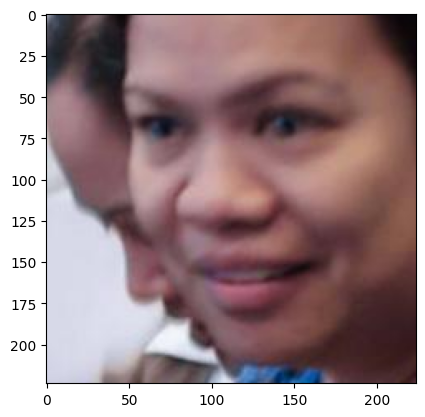

In [21]:
def view(img):
    plt.imshow(img.permute(1, 2, 0))
    
# print(len(train_dataset), len(val_dataset))
test = 5678
print(train_dataset[test][1:])
view(train_dataset[test][0])